# ניתוח נתונים סטטיסטיים - משימה 1

## תיאור הדאטה

בחרנו בדאטה על מוזיקה, כאשר הדאטה נלקח מאפליקציית ספוטיפיי כשמטרתו העיקרית היא לחזות האם שיר מסוים הוא להיט או כישלון.
הדאטה מורכב משישה קבצים עבור מוזיקה משנות ה60,70,80,90,2000,2010.
בכל קובץ ישנן 19 עמודות שיפורטו בהמשך כאשר אנו בחרנו בשלב זה להתמקד בקובץ של שירים מהשנים 2010-2019.

## קישור

https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset#dataset-of-10s.csv

In [1]:
import pandas as pd

In [2]:
musicFrom2010_2019 = pd.read_csv('dataset-of-10s.csv')

In [3]:
musicFrom2010_2019.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [4]:
categoricalFeatures = ['track', 'artist', 'key', 'mode', 'target']
numericalFeatures = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']

In [5]:
musicFrom2010_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
track               6398 non-null object
artist              6398 non-null object
uri                 6398 non-null object
danceability        6398 non-null float64
energy              6398 non-null float64
key                 6398 non-null int64
loudness            6398 non-null float64
mode                6398 non-null int64
speechiness         6398 non-null float64
acousticness        6398 non-null float64
instrumentalness    6398 non-null float64
liveness            6398 non-null float64
valence             6398 non-null float64
tempo               6398 non-null float64
duration_ms         6398 non-null int64
time_signature      6398 non-null int64
chorus_hit          6398 non-null float64
sections            6398 non-null int64
target              6398 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 949.8+ KB


In [6]:
dataSummary = musicFrom2010_2019.describe()
dataSummary

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [7]:
def makeGraph(feature):
    fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(221)
    values = musicFrom2010_2019[feature]
    values.plot.kde(ax=ax, legend=False, title=feature)
    values.plot.hist(density=False, ax=ax)
    ax.set_xlim([values.min() - 0.1, values.max() + 0.1])
    ax.grid(axis='both')
    ax.set_facecolor('#d8dcd6')
    return fig

## ניתוח תאורי של הנתונים

### גרפים של משתנים נומריים

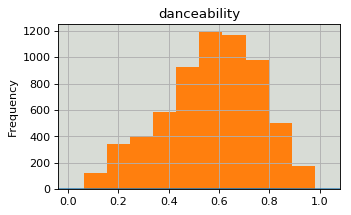

count    6398.000000
mean        0.568163
std         0.191103
min         0.062200
25%         0.447000
50%         0.588000
75%         0.710000
max         0.981000
Name: danceability, dtype: float64


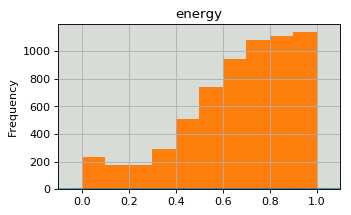

count    6398.000000
mean        0.667756
std         0.240721
min         0.000251
25%         0.533000
50%         0.712500
75%         0.857000
max         0.999000
Name: energy, dtype: float64


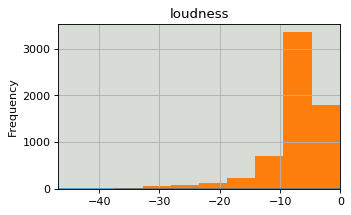

count    6398.000000
mean       -7.589796
std         5.234592
min       -46.655000
25%        -8.425000
50%        -6.096500
75%        -4.601250
max        -0.149000
Name: loudness, dtype: float64


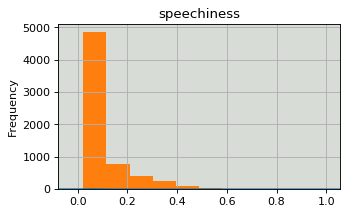

count    6398.000000
mean        0.098018
std         0.097224
min         0.022500
25%         0.038825
50%         0.057200
75%         0.112000
max         0.956000
Name: speechiness, dtype: float64


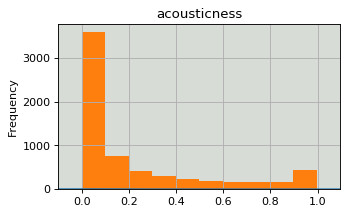

count    6398.000000
mean        0.216928
std         0.296835
min         0.000000
25%         0.008533
50%         0.067050
75%         0.311000
max         0.996000
Name: acousticness, dtype: float64


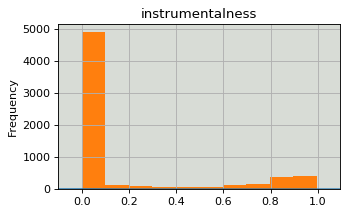

count    6398.000000
mean        0.165293
std         0.318736
min         0.000000
25%         0.000000
50%         0.000017
75%         0.057650
max         0.995000
Name: instrumentalness, dtype: float64


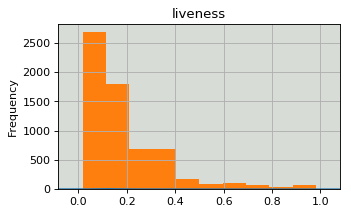

count    6398.000000
mean        0.196700
std         0.166148
min         0.016700
25%         0.096800
50%         0.126000
75%         0.249000
max         0.982000
Name: liveness, dtype: float64


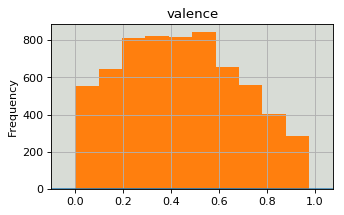

count    6398.000000
mean        0.443734
std         0.245776
min         0.000000
25%         0.240000
50%         0.434000
75%         0.628000
max         0.976000
Name: valence, dtype: float64


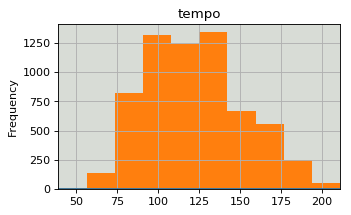

count    6398.000000
mean      122.353871
std        29.847389
min        39.369000
25%        98.091250
50%       121.070000
75%       141.085000
max       210.977000
Name: tempo, dtype: float64


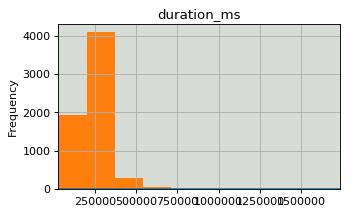

count    6.398000e+03
mean     2.367042e+05
std      8.563698e+04
min      2.985300e+04
25%      1.932068e+05
50%      2.212465e+05
75%      2.593165e+05
max      1.734201e+06
Name: duration_ms, dtype: float64


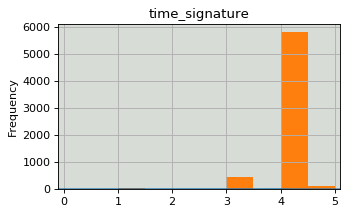

count    6398.000000
mean        3.930916
std         0.377469
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64


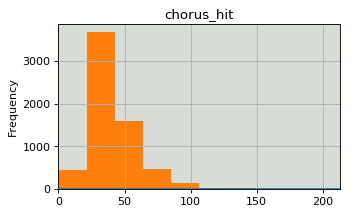

count    6398.000000
mean       41.028399
std        19.568827
min         0.000000
25%        28.059135
50%        36.265365
75%        48.292538
max       213.154990
Name: chorus_hit, dtype: float64


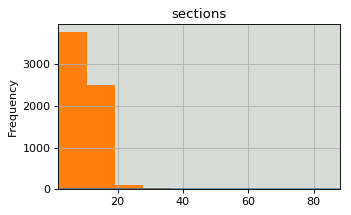

count    6398.000000
mean       10.316505
std         3.776011
min         2.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        88.000000
Name: sections, dtype: float64


In [30]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

for numerical in numericalFeatures:
    fig = makeGraph(numerical)
    plt.show()
    print(dataSummary[numerical])

### גרפים של משתנים קטגוריאלים

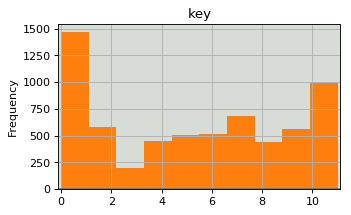

count    6398.000000
mean        5.283526
std         3.606216
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64


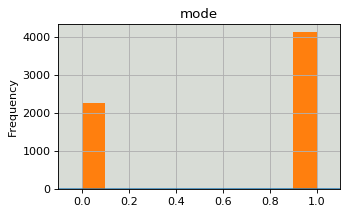

count    6398.000000
mean        0.645514
std         0.478395
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64


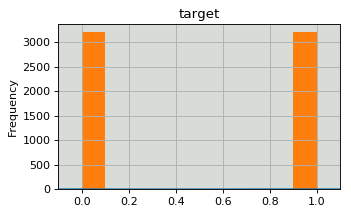

count    6398.000000
mean        0.500000
std         0.500039
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: target, dtype: float64


In [26]:
for categorical in categoricalFeatures[2:5]:
    fig = makeGraph(categorical)
    plt.show()
    print(dataSummary[categorical])

## שאלות מחקר

### ?שאלה ראשונה: האם עליה במשתנה האנרגיה גורמת לעליה במשתנה החיות

X = Energy, Y = Liveness

### שאלה שניה: האם ירידה במשתנה הריקוד (עד כמה השיר מתאים לריקוד) גורמת לירידה בהסתברות שהשיר ייחשב כלהיט? כלומר 1 

X = Danceability, Y = Target (1 - Hit, 0 - Flop)

### ?שאלת מבחן: האם הערך של משתנה מסביר תו דומיננטי שונה בין קטגוריות שונות של מודליות השיר

X = Key, Y = Mode

In [28]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

keys = musicFrom2010_2019['key']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(np.array(keys.values))
    # here's the parameters of your distribution, scale, location
    print('distribution:\n', dist_name, '\ndist parameters:\n', param)

distribution:
 gamma 
dist parameters:
 (23159.576279933077, -543.442003721294, 0.023693238123290696)
distribution:
 beta 
dist parameters:
 (0.8380377709834345, 0.8029916415864001, -0.5359634672862916, 11.535963467286294)
distribution:
 rayleigh 
dist parameters:
 (-1.5187459613377148, 5.443998491708569)
distribution:
 norm 
dist parameters:
 (5.283526101906846, 3.605934543806948)
distribution:
 pareto 
dist parameters:
 (102573.10313011857, -514222.0104568186, 514222.01045598194)
